## My Lab 19 
- Quantum Key ditribution for this lab 
- **OBJECTIVES** : Generating random keys and sending it over through simulation

In [1]:
import numpy as np 
from qiskit import * 
import random

### Generating Random Bits
- WHY? Because Alice and Bob need to generate random bits to generate a KEY.
- `getrandbits(n)` gives an **n - bit** random number
- These random numbers are **pseudo random**
- Can also use **quantum_states** to generate truly random numbers

In [2]:
rand_key = bin(random.getrandbits(50))
print("Random Key is :",len(rand_key))

Random Key is : 50


### Appending Strings
- We generate keys in **python** by generating **1 random bit** and then append it to the key that we have for Alice

In [3]:
alice_key = ""
for _ in range(40):
    alice_key += str(random.getrandbits(1))
print(alice_key)
print("Length of key :",len(alice_key))

1100110100011101110111010001101110000101
Length of key : 40


### Appending to Lists
- Store the list of qubits that Alice sends to Bob
- Alice generates **list of qubits one-by-one**

### Functions to create the qubits
- The qubits are produced inside a function and thus help in reducing repetition of creating the qubits

# Quantum Key Ditribution
- **KEY** : It is important for the sender and reciever to communicate through a KEY, something secret that is only known to them. KEY is used for encoding and decoding messages that are sent

- QKD allows us to establish a shared key which is RANDOM.
- Both have the same sequence of **0s and 1s**
- Alice and Bob **DON'T HAVE TO MEET EACH OTHER EVEN ONCE**
- This key is STILL TRANSFERRED SECRETLY.

### GOAL 
- To **ESTABLISH A CONNECTION WITH A SECRET and RANDOM KEY**
- This is a **symmetric key distribution**

# This is a 100% secure key distribution technique

### It employs quantum mechanics to get the knowledge about whether your key was tampered with or not


- Note : the information being transferred is just **CLASSICAL** but **KEY BEING TRANSFERRED IS TRANSFERRED THROUGH A QUANTUM CHANNEL**

# STEPS

## Step1 and Step2
- Alice randomly selects a basis for each qubit : **(+ / x)**
- Bob selects a random basis for each of the qubits : **(+ / x)**

## Step3
- Alice encodes her QUBITS ACCORDING TO THE BASES SHE CHOSE

## LET'S START!!

In [10]:
from qiskit import * 
from random import getrandbits

### Pre - Knowledge 
- **You need to establish the length of the KEY**
- Here -> **KEY : 500 bits**
- Also we have a quantum and a classical channel

In [53]:
length_key = 500
q_channel = []
c_channel = []


## Step1 : Alice selects bit-string and bases
- Generate 500 bits that are random 
- Then generate another 500 bits to specify the **basis**

In [54]:
def select_encoding(length):
    # To store the random 0 / 1
    alice_bits = ""
    # to store the random vertical or diagonal bases 
    alice_bases = ""
    
    for _ in range(length):
        # just use randbits and append to the end of the string
        alice_bits += str(getrandbits(1))
        alice_bases += str(getrandbits(1))
        
    return alice_bits, alice_bases

In [55]:
alice_bits, alice_bases = select_encoding(length_key)
print("Alice's bits :",alice_bits[:20],"\n")
print("Alice's basis string :",alice_bases[:20])

Alice's bits : 11000101111001010111 

Alice's basis string : 00111100111001101011


## Step2 : Bob selects bases
- BOB NEEDS TO SELECT **only bases**
- Why? **BOB ONLY SELECTS THE BASES IN WHICH HE NEEDS TO MEASURE**

In [56]:
def select_bob_measurement(length):
    bob_bases = ""
    # bob selects the bases in which he wants to measure
    for _ in range(length):
        bob_bases += str(getrandbits(1))
        
    return bob_bases

In [57]:
bob_bases = select_bob_measurement(length_key)
print("Bob's string:",bob_bases[:20])

Bob's string: 10000100111100111101


<a id="step3"></a>
## 2.3. Step 3: Encode : All alice

Alice now uses her random list of numbers to generate a bunch of quantum states:
In this excercise we are going to represent the creation of a qubit as an individual `QuantumCircuit` object.

The table below summarizes the qubit states Alice sends, based on the bit of Alice's `alice_bitstring` the corresponding bit of `selected_bases`:

| Bit in Alice's `alice_bitstring` | Corresponding bit in `selected_bases` | Encoding basis | Qubit state sent |
|:----------------:|:--------------------------:|:--------------------------:|:---------------:|
| 0 | 0 | $$|0\rangle,|1\rangle$$ |$$|0\rangle$$ |
| 0 | 1 | $$|+\rangle,|-\rangle$$ |$$|+\rangle$$ |
| 1 | 0 | $$|0\rangle,|1\rangle$$ |$$|1\rangle$$ |
| 1 | 1 | $$|+\rangle,|-\rangle$$ |$$|-\rangle$$ |

In [58]:
def generate_zqubit(q):
    Q = QuantumCircuit(1,1)
    if(int(q) == 1):
        Q.x(0)
    return Q
    
def generate_xqubit(q):
    Q = QuantumCircuit(1,1)
    if(int(q) == 0):
        Q.h(0)
    else:
        Q.x(0)
        Q.h(0)
    return Q
        

In [59]:
def encoded_qubits(alice_bits,alice_bases):
    '''Encoded qubits : returns a list of QuantumCircuits with 
                         each QuantumCircuit representing a qubit'''
    encoded = []
    for i,k in zip(alice_bits,alice_bases):
        
#         print(" Alice bit :",i,"Basis :",k)

        if(i == '0' and k == '0'):
            # encoding is + and qubit would be |0>
            q = generate_zqubit(i)
        if(i == '1' and k == '0'):
            # encoding is + and qubit would be |1> 
            q = generate_zqubit(i)
        if(i == '0' and k == '1'):
            # encoding is x and qubit would be |+>
            q = generate_xqubit(i) 
        if(i == '1' and k == '1'):
            q = generate_xqubit(i)
#         display(q.draw('mpl'))
        # now append the qubit in the channel 
        encoded.append(q)
    
    return encoded  
    

In [60]:
encoded_alice_bits = encoded_qubits(alice_bits,alice_bases)

## Step4 : All alice
- Send the qubits that you have to the **q_channel** 
- These qubits are just assigned to the quantum channel

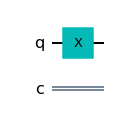

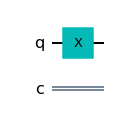

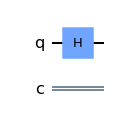

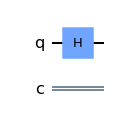

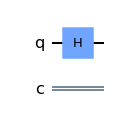

In [61]:
q_channel = encoded_alice_bits
for k in q_channel[:5]:
    display(k.draw('mpl'))

## Step5 : Bob Measures
- Bob now has to measure the qubits in the **RANDOM BASES THAT HE CHOSE IN PART 2**
- Note : At the end of the measurement at Bob's end, **he does not have the key, just HIS MEASUREMENTS**

### SHOTS = 1 is important for simulation

In [62]:
def measure_key(bob_bases, encoded_qubits,backend):
    # Perform the measurement on the qubits you recieved from Alice
    
    # This is because Bob is going to need to measure the qubit he 
    # has recieved 
    
    # Bob's bases need not be the same as the bases of Alice
    
    bob_bitstring = ""
    for i,k in zip(bob_bases,encoded_qubits):
        if i == '0':
            # bob chose the Z basis
            k.measure(0,0)
        else:
            # bob chose the x basis
            k.h(0) # why? because this is going to bring our |+> as a |0> # and it is going to bring |-> into |1>
            k.measure(0,0) 
        
        counts = execute(k,backend=backend,shots= 1).result().get_counts()
        
        # max with a key is just a max function which gets the key with the maximum value
        measure_bit = max(counts, key = counts.get) 
        bob_bitstring += str(measure_bit)
    
    return bob_bitstring
            

In [63]:
sim_backend = Aer.get_backend('qasm_simulator')
bob_string = measure_key(bob_bases,q_channel,sim_backend)

In [64]:
bob_string

'01000101111101000111111011111011111110111000010111010110010011001111101011111111011000101100100101110011000100110000010000111010100101010011010110011010111000000110111110101100001010100011111110111010100010101001100101111101101010000110001011100101000010001000110101001101001110001000100101111011111100101011000100011101100010001100011111111101001010011001011110001000001100111001101010001110011010110011001100111010111100100101010001111100111011110000011110100101100001000001001100010110100110111010'

- The measured string is **not** the same as Alice's key

In [65]:
alice_bits == bob_string

False

## Step 6 : All Alice
- Announce the BASES to bob via a classical channel.
    - Note: **This all happened AFTER THE STATE HAS BEEN SENT SO EVE, EVEN IF SHE HEARD THE BASIS, CAN'T SET UP HER BASES AND THEN MEASURE , BECAUSE THE STATE HAS ALREADY BEEN PASSED THROUGH**

In [66]:
c_channel = alice_bases

## Step 7 : Find the symmetric key 
- Now , given you have the bases of ALICE with you, you may identify **which bases you had same as ALICE**

In [67]:
def compare_bases(bob_bases,alice_bases):
    '''compare_bases function just returns the 
       list of indices that Bob and Alice agree on 
       AFTER ALICE ANNOUNCES her bases 
       '''
    indices = []
    
    for i in range(len(bob_bases)):
        if(bob_bases[i] == alice_bases[i]):
            indices.append(i)
            
    return indices

In [68]:
indices = compare_bases(bob_bases,c_channel)
c_channel = indices 

 Now, Bob will send the information to Alice that **THEY AGREED ON SO AND SO INDICES**

In [69]:
def construct_key_from_index(bit_string,indices):
    '''Returns the final key for both alice and bob
       given that they both know where they agreed upon'''
    final_key =""
    for k in indices:
        final_key+= str(bit_string[k])
        
    return final_key

In [70]:
alice_key = construct_key_from_index(alice_bits,indices)

In [71]:
bob_key = construct_key_from_index(bob_string,indices)

In [72]:
print("Alice's Key :",alice_key)
print("\nBob's Key :  ",bob_key)

Alice's Key : 110111100011011011111011110111111001111001011101000011000101100111001111001110101100111110110100100111110110000010110010010000010100100001101101111001011001000111010001111010110111010100011010010000111011010110111001001000011011111001000000101010001110

Bob's Key :   110111100011011011111011110111111001111001011101000011000101100111001111001110101100111110110100100111110110000010110010010000010100100001101101111001011001000111010001111010110111010100011010010000111011010110111001001000011011111001000000101010001110


## Why are these keys same? 
- This is because these keys are formed according to certain indices.
- Which indices? Those indices **WHERE THEIR BASES MATCHED ACTUALLY**
- So, if their bases matched, then WE USED THOSE MATCHED BASES TO ACTUALLY CONSTRUCT OUR KEY

In [73]:
print("Length of original key :",length_key)
print("Length of final key :",len(alice_key))

Length of original key : 500
Length of final key : 252


## Finally, they are same

In [74]:
alice_key == bob_key

True

## to -do  : Implement eavesdropping